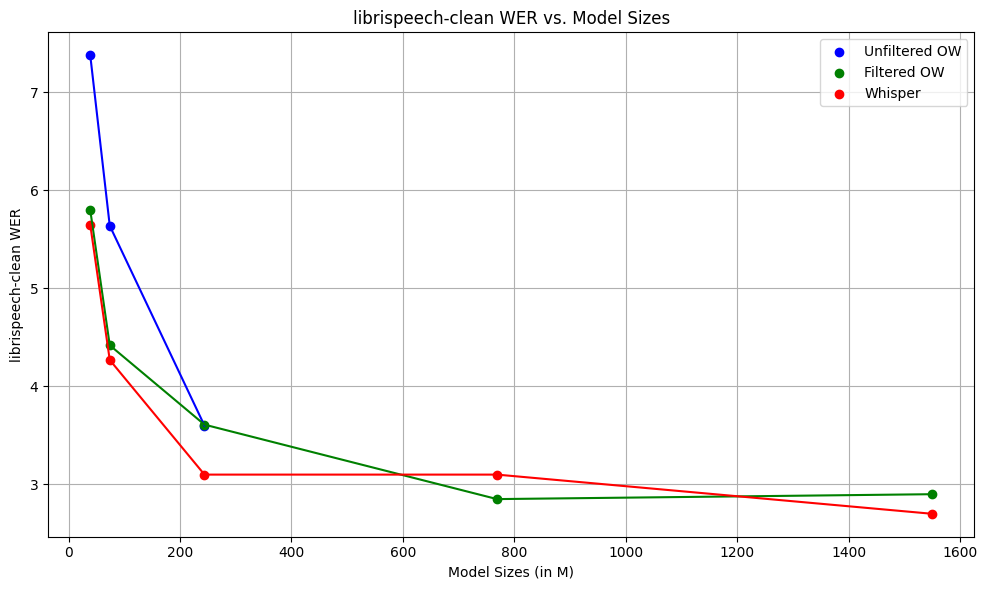

In [ ]:
import matplotlib.pyplot as plt

# Sample data
ow_unfiltered_x = [39, 74, 244, 769, 1550]
ow_unfiltered_y = [7.38, 5.64, 3.6]  # Shorter than list1_x

ow_filtered_x = [39, 74, 244, 769, 1550]
ow_filtered_y = [5.8, 4.42, 3.61, 2.85, 2.9]

whisper_x = [39, 74, 244, 769, 1550]
whisper_y = [5.65, 4.27, 3.1, 3.1, 2.7]

# Aligning list1_x to the length of list1_y
ow_unfiltered_x = ow_unfiltered_x[:len(ow_unfiltered_y)]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.scatter(ow_unfiltered_x, ow_unfiltered_y, label="Unfiltered OW", color='blue')
plt.plot(ow_unfiltered_x, ow_unfiltered_y, color='blue')

plt.scatter(ow_filtered_x, ow_filtered_y, label="Filtered OW", color='green')
plt.plot(ow_filtered_x, ow_filtered_y, color='green')

plt.scatter(whisper_x, whisper_y, label="Whisper", color='red')
plt.plot(whisper_x, whisper_y, color='red')

# Add labels, legend, and title
plt.xlabel("Model Sizes (in M)")
plt.ylabel("librispeech-clean WER")
plt.title("librispeech-clean WER vs. Model Sizes")
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

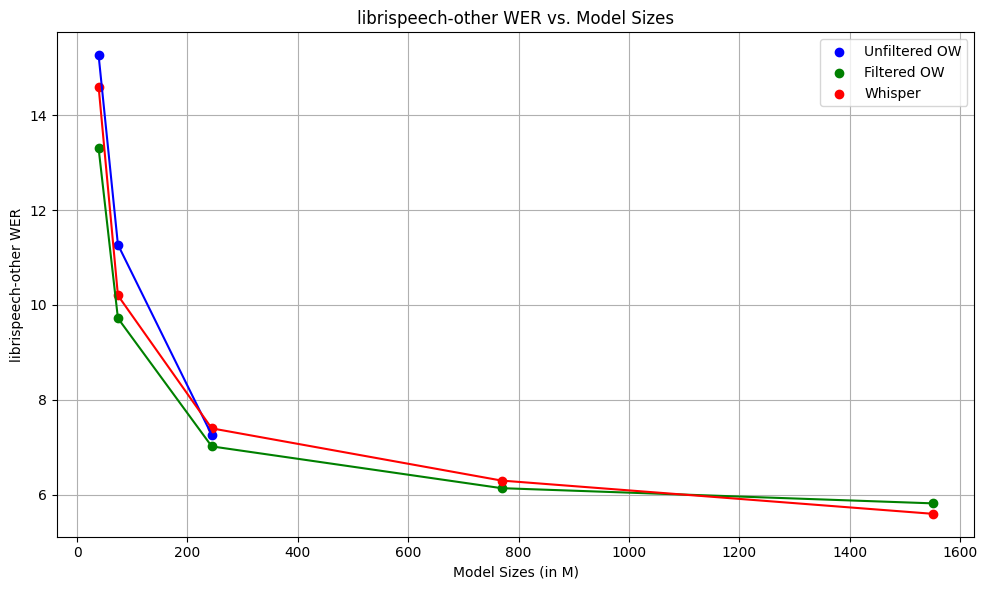

In [ ]:
import matplotlib.pyplot as plt

# Sample data
ow_unfiltered_x = [39, 74, 244, 769, 1550]
ow_unfiltered_y = [15.26, 11.27, 7.26]  # Shorter than list1_x

ow_filtered_x = [39, 74, 244, 769, 1550]
ow_filtered_y = [13.3, 9.72, 7.02, 6.14, 5.82]

whisper_x = [39, 74, 244, 769, 1550]
whisper_y = [14.6, 10.2, 7.4, 6.3, 5.6]

# Aligning list1_x to the length of list1_y
ow_unfiltered_x = ow_unfiltered_x[:len(ow_unfiltered_y)]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each list
plt.scatter(ow_unfiltered_x, ow_unfiltered_y, label="Unfiltered OW", color='blue')
plt.plot(ow_unfiltered_x, ow_unfiltered_y, color='blue')

plt.scatter(ow_filtered_x, ow_filtered_y, label="Filtered OW", color='green')
plt.plot(ow_filtered_x, ow_filtered_y, color='green')

plt.scatter(whisper_x, whisper_y, label="Whisper", color='red')
plt.plot(whisper_x, whisper_y, color='red')

# Add labels, legend, and title
plt.xlabel("Model Sizes (in M)")
plt.ylabel("librispeech-other WER")
plt.title("librispeech-other WER vs. Model Sizes")
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file (assuming the CSV has a column named 'WER')
csv_file = 'experiment_results.csv'
data = pd.read_csv(csv_file)
wer_values = data['WER'].values

# Bootstrapping parameters
n_bootstrap_samples = 1000  # Number of bootstrap samples to generate
sample_size = len(wer_values)  # Sample size for each bootstrap (same as original data)

# Generate bootstrap samples and compute the mean of each sample
bootstrap_means = []
for _ in range(n_bootstrap_samples):
    sample = np.random.choice(wer_values, size=sample_size, replace=True)
    bootstrap_means.append(np.mean(sample))

# Calculate statistics from bootstrap samples
mean_of_means = np.mean(bootstrap_means)
std_dev = np.std(bootstrap_means)  # Standard deviation of bootstrap means
std_err = std_dev / np.sqrt(sample_size)  # Standard error of the mean

print(f"Mean of Bootstrap Means: {mean_of_means:.4f}")
print(f"Standard Deviation of Bootstrap Means: {std_dev:.4f}")
print(f"Standard Error of the Mean: {std_err:.4f}")

# Plotting the distribution of bootstrap sample means
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue')
plt.axvline(mean_of_means, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_of_means - std_err, color='green', linestyle='dashed', linewidth=2, label='Mean - SE')
plt.axvline(mean_of_means + std_err, color='green', linestyle='dashed', linewidth=2, label='Mean + SE')
plt.xlabel('Bootstrap Sample Means')
plt.ylabel('Frequency')
plt.title('Distribution of Bootstrap Sample Means')
plt.legend()
plt.show()

In [ ]:
def plot_box_plot(plot_dir: str, results: dict):
    """
    Creates a box plot for bootstrap sample distributions across multiple datasets.
    
    Args:
        results (dict): Dictionary containing dataset names as keys and 
                        their computed bootstrap means as values.
    """
    dataset_names = list(results.keys())
    bootstrap_data = [results[name]["bootstrap_means"] for name in dataset_names]
    means = [results[name]["mean"] for name in dataset_names]  # Extract mean values

    # Create the box plot
    plt.figure(figsize=(10, 6))
    boxplot = plt.boxplot(bootstrap_data, labels=dataset_names, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    # Retrieve whisker values (upper whisker is stored in fliers array)
    whisker_max_values = [max(bp.get_ydata()) for bp in boxplot["whiskers"][1::2]]  # Extract upper whisker values

    # Add mean labels above the maximum whisker
    for i, (mean_val, whisker_max) in enumerate(zip(means, whisker_max_values)):
        plt.text(i + 1, whisker_max + 0.02,  # Slightly above the whisker
                 f'{mean_val:.4f}', ha='center', va='bottom', fontsize=10, color='black')

    plt.xlabel('Datasets')
    plt.ylabel('Bootstrap Sample Means')
    plt.title('WER Comparison Across Datasets (Bootstrap Distributions)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    save_path = f"{plot_dir}/ow_bootstrap_boxplot.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    
def plot_box(data_dir: str, plot_dir: str, n_bootstrap: int = 1000):
    """
    Main function to execute bootstrapping for multiple CSV files.
    
    Args:
        csv_files (list): List of CSV file paths.
        column_name (str): Column name containing WER values.
        n_bootstrap (int): Number of bootstrap samples.
    """
    results = {}

    for csv_file in glob.glob(data_dir + "/*.csv"):
        dataset_name = os.path.basename(csv_file).split("_sample")[0]  # Extract name without .csv
        wer_ref_len_values = load_data(csv_file)
        bootstrap_means = bootstrap_sampling(wer_ref_len_values, n_bootstrap)
        stats = compute_statistics(bootstrap_means)

        results[dataset_name] = stats

        print(f"Dataset: {dataset_name}")
        print(f"  Mean of Bootstrap Means: {stats['mean']:.4f}")
        print(f"  Standard Deviation of Bootstrap Means: {stats['std_dev']:.4f}")
        print(f"  Standard Error of the Mean: {stats['std_err']:.4f}\n")

    # Plot the results
    plot_box_plot(plot_dir, results)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(csv_file: str) -> np.ndarray:
    """
    Loads the WER values from a CSV file.
    
    Args:
        csv_file (str): Path to the CSV file.
        column_name (str): The name of the column containing WER values.
    
    Returns:
        np.ndarray: Array of WER values.
    """
    data = pd.read_csv(csv_file)
    return data[['wer', 'ref_length']].values

def weighted_avg(data):
    wer = np.array([value[0] for value in data])
    ref_length = np.array([value[-1] for value in data])
    avg = np.sum(wer * ref_length) / np.sum(ref_length)
    return avg

def bootstrap_sampling(data: np.ndarray, n_bootstrap: int = 1000) -> np.ndarray:
    """
    Performs bootstrapping on the given data.
    
    Args:
        data (np.ndarray): The original data array.
        n_bootstrap (int): Number of bootstrap samples to generate.
    
    Returns:
        np.ndarray: Array of bootstrap sample means.
    """
    sample_size = len(data)
    bootstrap_samples = [
        data[np.random.choice(list(range(len(data))), size=sample_size, replace=True)]
        for _ in range(n_bootstrap)
    ]
    bootstrap_means = [weighted_avg(sample) * 100 for sample in bootstrap_samples]
    return np.array(bootstrap_means)

def compute_statistics(bootstrap_means: np.ndarray) -> dict:
    """
    Computes mean, standard deviation, and standard error from bootstrap means.
    
    Args:
        bootstrap_means (np.ndarray): Array of bootstrap sample means.
    
    Returns:
        dict: A dictionary containing mean, standard deviation, and standard error.
    """
    mean_of_means = np.mean(bootstrap_means)
    std_dev = np.std(bootstrap_means)
    std_err = std_dev / np.sqrt(len(bootstrap_means))  # Standard error of the mean

    return {
        "mean": mean_of_means,
        "std_dev": std_dev,
        "std_err": std_err,
        "bootstrap_means": bootstrap_means,
    }

def plot_bootstrap_distribution(csv_file, plot_dir: str, bootstrap_means: np.ndarray, stats: dict):
    """
    Plots the distribution of bootstrap sample means with error bars.
    
    Args:
        bootstrap_means (np.ndarray): Array of bootstrap sample means.
        stats (dict): Dictionary containing mean, standard deviation, and standard error.
    """
    eval_set = os.path.basename(csv_file).split('.csv')[0].split('_sample')[0]
    plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue', label='Bootstrap Means')
    plt.axvline(stats['mean'], color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(stats['mean'] - stats['std_err'], color='black', linestyle='dashed', linewidth=2, label='Mean - SE')
    plt.axvline(stats['mean'] + stats['std_err'], color='black', linestyle='dashed', linewidth=2, label='Mean + SE')

    plt.xlabel('Bootstrap Sample Means')
    plt.ylabel('Frequency')
    plt.title(f'{eval_set} - Distribution of Bootstrap Sample Means')
    plt.legend()
    save_path = f"{plot_dir}/{eval_set}.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

def plot_hist(csv_file: str, plot_dir: str, n_bootstrap: int = 1000):
    """
    Main function to execute the bootstrapping process.
    
    Args:
        csv_file (str): Path to the CSV file.
        column_name (str): Column name containing WER values.
        n_bootstrap (int): Number of bootstrap samples.
    """
    # Load data
    wer_ref_len_values = load_data(csv_file)

    # Perform bootstrapping
    bootstrap_means = bootstrap_sampling(wer_ref_len_values, n_bootstrap)

    # Compute statistics
    stats = compute_statistics(bootstrap_means)

    # Print results
    print(f"Mean of Bootstrap Means: {stats['mean']:.4f}")
    print(f"Standard Deviation of Bootstrap Means: {stats['std_dev']:.4f}")
    print(f"Standard Error of the Mean: {stats['std_err']:.4f}")

    # Plot results
    plot_bootstrap_distribution(csv_file, plot_dir, bootstrap_means, stats)

In [ ]:
for csv_file in glob.glob("logs/data/evals/text_heurs_1_manmach_0.9_editdist_0.28/*.csv"):
    plot_hist(csv_file, "logs/plots")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(csv_file: str) -> np.ndarray:
    """
    Loads the WER values from a CSV file.
    
    Args:
        csv_file (str): Path to the CSV file.
        column_name (str): The name of the column containing WER values.
    
    Returns:
        np.ndarray: Array of WER values.
    """
    data = pd.read_csv(csv_file)
    return data[['wer', 'ref_length']].values

def weighted_avg(data):
    wer = np.array([value[0] for value in data])
    ref_length = np.array([value[-1] for value in data])
    avg = np.sum(wer * ref_length) / np.sum(ref_length)
    return avg

def bootstrap_sampling(data: np.ndarray, n_bootstrap: int = 1000) -> np.ndarray:
    """
    Performs bootstrapping on the given data.
    
    Args:
        data (np.ndarray): The original data array.
        n_bootstrap (int): Number of bootstrap samples to generate.
    
    Returns:
        np.ndarray: Array of bootstrap sample means.
    """
    sample_size = len(data)
    bootstrap_samples = [
        data[np.random.choice(list(range(len(data))), size=sample_size, replace=True)]
        for _ in range(n_bootstrap)
    ]
    bootstrap_means = [weighted_avg(sample) * 100 for sample in bootstrap_samples]
    return np.array(bootstrap_means)

def compute_statistics(bootstrap_means: np.ndarray) -> dict:
    """
    Computes mean, standard deviation, and standard error from bootstrap means.
    
    Args:
        bootstrap_means (np.ndarray): Array of bootstrap sample means.
    
    Returns:
        dict: A dictionary containing mean, standard deviation, and standard error.
    """
    mean_of_means = np.mean(bootstrap_means)
    std_dev = np.std(bootstrap_means)
    std_err = std_dev / np.sqrt(len(bootstrap_means))  # Standard error of the mean

    return {
        "mean": mean_of_means,
        "std_dev": std_dev,
        "std_err": std_err,
        "bootstrap_means": bootstrap_means,
    }

def plot_bootstrap_distribution(csv_file: str, plot_dir: str, bootstrap_means: np.ndarray, stats: dict):
    """
    Plots the distribution of bootstrap sample means with error bars and statistics annotations.

    Args:
        csv_file (str): Path to the CSV file.
        plot_dir (str): Directory to save the plot.
        bootstrap_means (np.ndarray): Array of bootstrap sample means.
        stats (dict): Dictionary containing mean, standard deviation, and standard error.
    """
    eval_set = os.path.basename(csv_file).split('.csv')[0].split('_sample')[0]

    plt.figure(figsize=(8, 6))
    plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue', label='Bootstrap Means')
    
    # Add mean and standard error lines
    plt.axvline(stats['mean'], color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(stats['mean'] - stats['std_err'], color='black', linestyle='dashed', linewidth=2, label='Mean - SE')
    plt.axvline(stats['mean'] + stats['std_err'], color='black', linestyle='dashed', linewidth=2, label='Mean + SE')

    plt.xlabel('Bootstrap Sample Means')
    plt.ylabel('Frequency')
    plt.title(f'{eval_set} - Distribution of Bootstrap Sample Means')
    plt.legend()

    # Positioning text inside the plot area
    text_x = stats['mean']  # Align text near the mean value
    text_y = plt.ylim()[1] * 0.8  # Position it 80% up in the y-axis

    plt.text(text_x, text_y,
             f"Mean: {stats['mean']:.4f}\n"
             f"Std Dev: {stats['std_dev']:.4f}\n"
             f"Std Err: {stats['std_err']:.4f}",
             fontsize=10, color='black', ha='left', bbox=dict(facecolor='white', alpha=0.7))

    # Save the plot
    os.makedirs(plot_dir, exist_ok=True)  # Ensure the directory exists
    save_path = os.path.join(plot_dir, f"{eval_set}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    print(f"Plot saved as {save_path}")

    plt.show()

def plot_hist(csv_file: str, plot_dir: str, n_bootstrap: int = 1000):
    """
    Main function to execute the bootstrapping process.
    
    Args:
        csv_file (str): Path to the CSV file.
        column_name (str): Column name containing WER values.
        n_bootstrap (int): Number of bootstrap samples.
    """
    # Load data
    wer_ref_len_values = load_data(csv_file)

    # Perform bootstrapping
    bootstrap_means = bootstrap_sampling(wer_ref_len_values, n_bootstrap)

    # Compute statistics
    stats = compute_statistics(bootstrap_means)

    # Print results
    print(f"Mean of Bootstrap Means: {stats['mean']:.4f}")
    print(f"Standard Deviation of Bootstrap Means: {stats['std_dev']:.4f}")
    print(f"Standard Error of the Mean: {stats['std_err']:.4f}")

    # Plot results
    plot_bootstrap_distribution(csv_file, plot_dir, bootstrap_means, stats)

In [ ]:
for csv_file in glob.glob("logs/data/evals/text_heurs_1_manmach_0.9_editdist_0.28/*.csv"):
    plot_hist(csv_file, "logs/plots")